<a href="https://colab.research.google.com/github/SAKETH-ADILLA/Machine-Learning/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis

Descriptive Statistics:

       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  

Missing Values:

Customer ID                 0
Age              

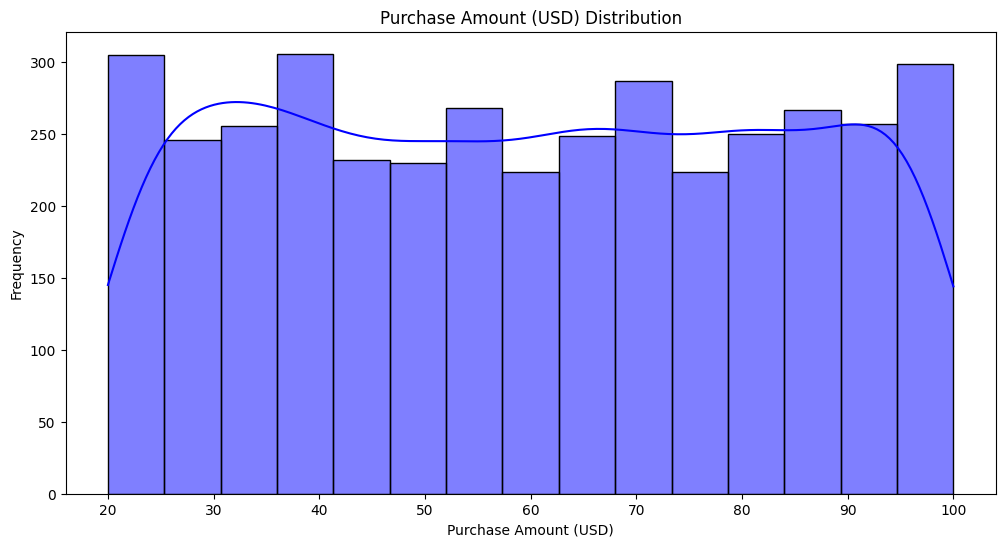


Top 10 Products by Purchase Amount (USD):

Item Purchased
Blouse        10410
Shirt         10332
Dress         10320
Pants         10090
Jewelry       10010
Sunglasses     9649
Belt           9635
Scarf          9561
Sweater        9462
Shorts         9433
Name: Purchase Amount (USD), dtype: int64


<ipython-input-21-af657428fe5e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')


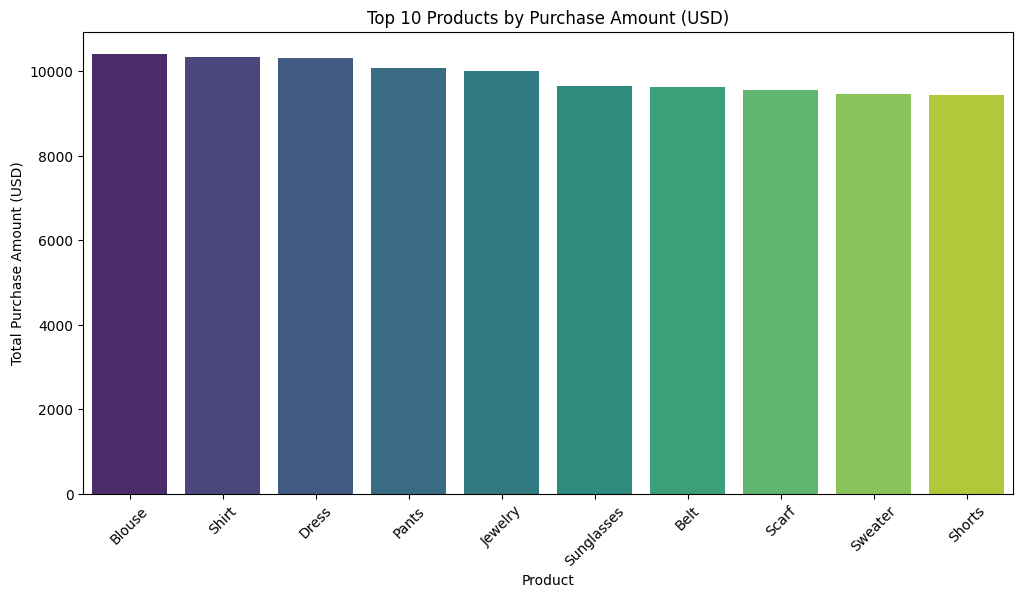

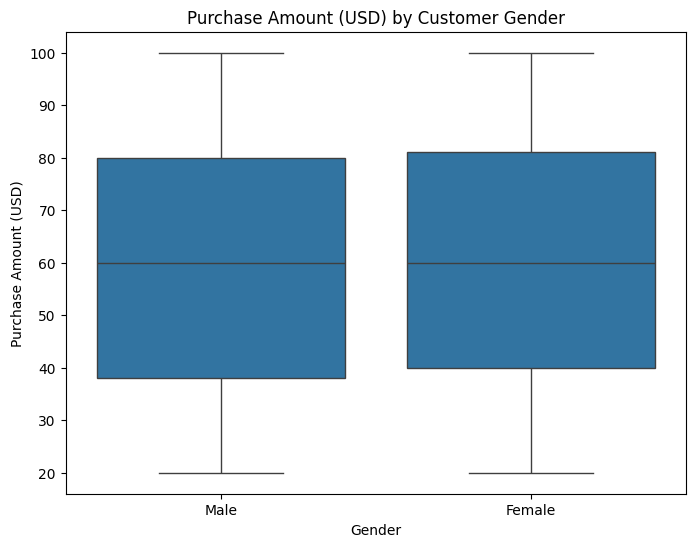

<ipython-input-21-af657428fe5e>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='Set2')


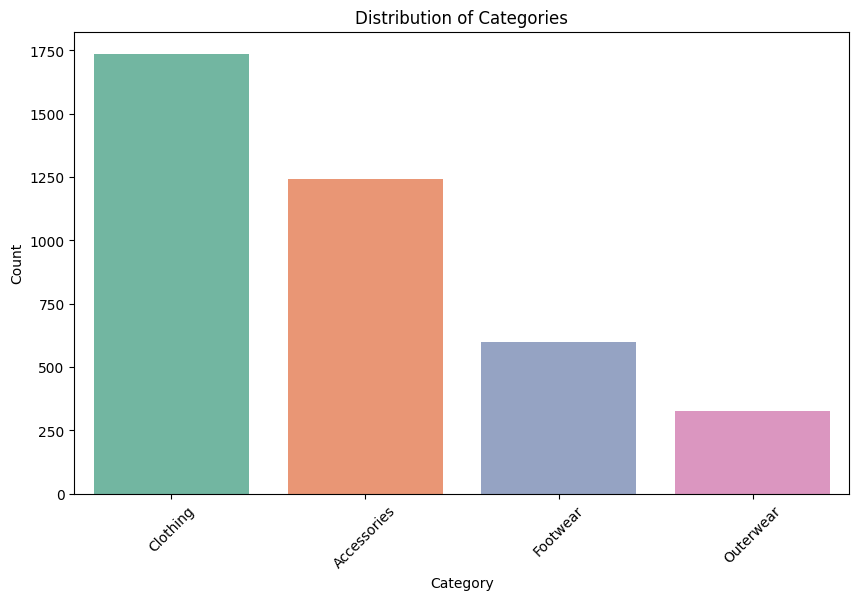

<ipython-input-21-af657428fe5e>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_method_distribution.index, y=payment_method_distribution.values, palette='coolwarm')


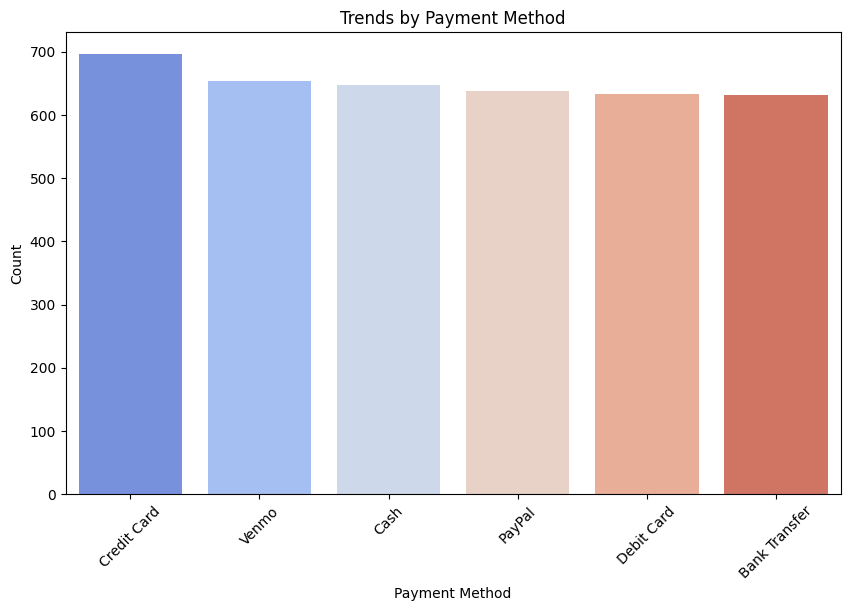

<ipython-input-21-af657428fe5e>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_sales.index, y=season_sales.values, palette='pastel')


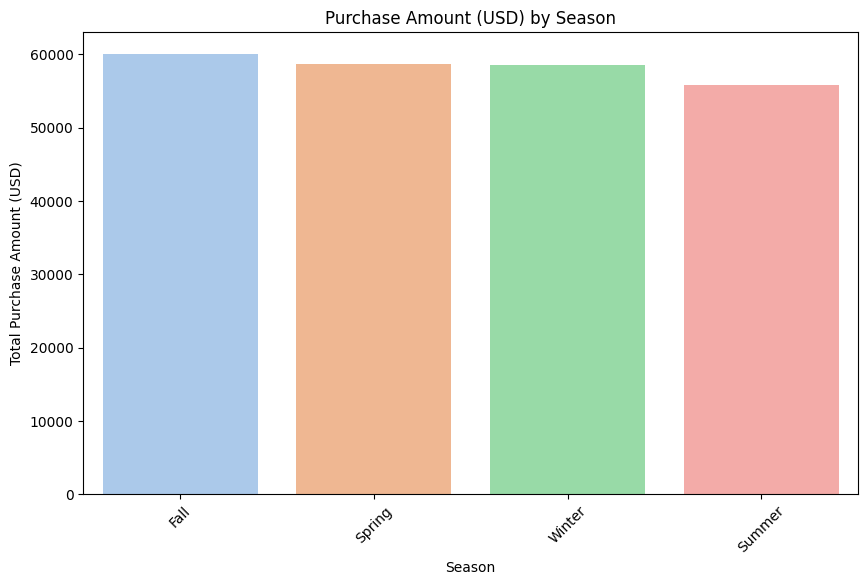


Code execution complete. Modify further if needed!


In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded dataset
file_path = 'shopping_trendscsv'
df = pd.read_csv('shopping_trends.csv')


# Clean column names to remove leading/trailing spaces
df.columns = df.columns.str.strip()

# Descriptive statistics
print("Descriptive Statistics:\n")
print(df.describe())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Sales column for analysis
sales_column = 'Purchase Amount (USD)'

# Visualize the distribution of Purchase Amount
plt.figure(figsize=(12, 6))
sns.histplot(df[sales_column], kde=True, color='blue')
plt.title(f'{sales_column} Distribution')
plt.xlabel(sales_column)
plt.ylabel('Frequency')
plt.show()

# Analyze top products by Purchase Amount
if 'Item Purchased' in df.columns:
    top_products = df.groupby('Item Purchased')[sales_column].sum().sort_values(ascending=False).head(10)
    print(f"\nTop 10 Products by {sales_column}:\n")
    print(top_products)

    # Visualize product popularity
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
    plt.title(f'Top 10 Products by {sales_column}')
    plt.xlabel('Product')
    plt.ylabel(f'Total {sales_column}')
    plt.xticks(rotation=45)
    plt.show()

# Analyze Purchase Amount by Customer Gender
if 'Gender' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Gender', y=sales_column, data=df)
    plt.title(f'{sales_column} by Customer Gender')
    plt.xlabel('Gender')
    plt.ylabel(sales_column)
    plt.show()

# Distribution of categories
if 'Category' in df.columns:
    category_distribution = df['Category'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='Set2')
    plt.title('Distribution of Categories')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Analyze trends by Payment Method
if 'Payment Method' in df.columns:
    payment_method_distribution = df['Payment Method'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=payment_method_distribution.index, y=payment_method_distribution.values, palette='coolwarm')
    plt.title('Trends by Payment Method')
    plt.xlabel('Payment Method')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Identify trends by Season
if 'Season' in df.columns:
    plt.figure(figsize=(10, 6))
    season_sales = df.groupby('Season')[sales_column].sum().sort_values(ascending=False)
    sns.barplot(x=season_sales.index, y=season_sales.values, palette='pastel')
    plt.title(f'{sales_column} by Season')
    plt.xlabel('Season')
    plt.ylabel(f'Total {sales_column}')
    plt.xticks(rotation=45)
    plt.show()

print("\nCode execution complete. Modify further if needed!")
